# importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Reading dataset and null check

In [5]:
data = pd.read_csv("customer_data.csv")
#print(data)
#print(f"null values: {data.isnull().sum()}")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        400 non-null    int64
 1   salary     400 non-null    int64
 2   purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# Normalizing features using minmax normalization 

In [6]:
z = (data - data.min()) / (data.max() - data.min())
print(z)

          age    salary  purchased
0    0.619048  0.177778        0.0
1    0.333333  0.777778        1.0
2    0.476190  0.259259        0.0
3    0.333333  0.888889        1.0
4    0.809524  0.044444        1.0
..        ...       ...        ...
395  0.214286  0.600000        1.0
396  0.119048  0.355556        0.0
397  0.714286  0.133333        1.0
398  0.714286  0.555556        1.0
399  0.571429  0.659259        1.0

[400 rows x 3 columns]


# Correlation between features

salary       0.362083
age          0.622454
purchased    1.000000
Name: purchased, dtype: float64


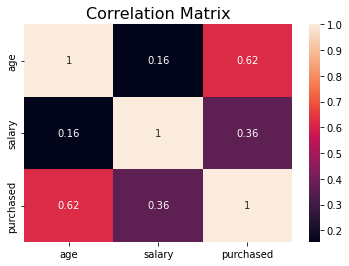

In [7]:
corr1=data.corr()['purchased']
print(corr1.sort_values())
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

# Spliting data into 75% train and 25% test

In [8]:
X = z.drop(columns=['purchased'])
Y = z['purchased']
#print(X)
#print(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=None)

# Implementating Logistic regression

In [32]:
class LogisticRegressionFromScratch():

    def fit(self ,x ,y , alpha , epochs=100):
        self.inter= np.ones((x.shape[0], 1))
        self.x_train = np.concatenate((self.inter, x), axis=1)
        self.y_train = y
        self.weight = np.zeros(self.x_train.shape[1])
        self.alpha = alpha
        self.epochs = epochs
        for i in range(self.epochs):
            z= self.sigmoid(self.x_train , self.weight)
            #self.loss(z  ,self.y_train)
            dw= self.gradientDescent(self.x_train , self.y_train , z)
            self.weight = self.weight - alpha * dw
        return self


    def predict(self , nx , lamda):
        nx = np.concatenate( (self.inter , nx ), axis=1)
        res = self.sigmoid(nx , self.weight)
        res = res >= lamda
        y_pred = np.zeros(res.shape[0])
        for i in range(len(y_pred)):
            if res[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred



    def sigmoid(self , x , weight):
        
        return 1.0/(1+np.exp(-np.dot(x , weight)))

    def costFunction(y , hx):
        return -1* (np.sum(y*np.log(hx) + (1-y) * np.log(1-hx)))

    def gradientDescent(self , x , y , hx):
         return np.dot(x.T, (hx - y)) / y.shape[0]
    
    def loss(self, hx, y):
        return (-y * np.log(hx) - (1 - y) * np.log(1 - hx)).mean()
        
    def accuracy(y , hx):
        return np.sum(y==hx) / len(y)



# Testing

In [45]:

alpha = 0
list = [0.000000001, 0.1, 0.01 , 0.001 , 0.0001 , 0.00001 , 0.0000001 ]
max =0
for i in list:
    #print(i)
    model = LogisticRegressionFromScratch()
    model.fit(x_train ,y_train  , i , 10000)
    hx =model.predict(x_train , 0.5)
    acc = sum(hx == y_train) / hx.shape[0]
    if acc > max:
        max = acc
        alpha = i
#model = LogisticRegressionFromScratch()
model.fit(x_train , y_train , alpha , 10000)
hx =model.predict(x_train , 0.5)
acc = sum(hx == y_train) / hx.shape[0]

print(acc)
print(alpha)



1e-09
0.1
0.01
0.001
0.0001
1e-05
1e-07
0.8333333333333334
0.1
